### Explorando os dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Ler o dataset**

In [3]:
from pandas import read_csv
series = read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

**Explorando e resumindo os dados**

In [4]:
series.describe()

count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
Name: Sales, dtype: float64

In [6]:
series.tail()

Month
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, dtype: int64

**Visualizando dados**

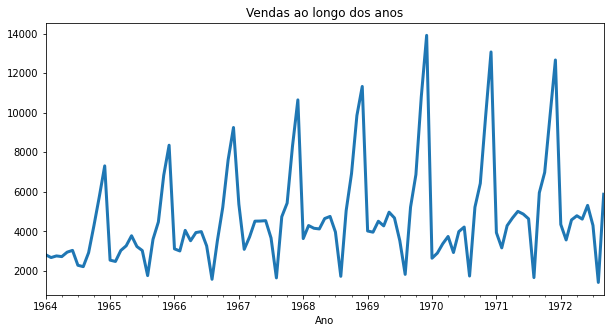

In [7]:
import matplotlib.pyplot as plt
series.plot(figsize=(10,5), 
            linewidth=3, 
            fontsize=10,
            title='Vendas ao longo dos anos')
plt.xlabel('Ano', fontsize=10);

In [8]:
series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

### Projeto: Prevendo dados futuros.

**Separando os dados para treino, teste e validação**

Vamos separar dois arquivos fisicos:

  - **dataset.csv**: Dados de 1964 a setembro de 1971.

  - **validation.csv**: Dados de Outubro de 1971 a Outubro de 1972 (1 ano de vendas).

In [9]:
# pega a quantidade de linhas e subtrai por 12
split_point = len(series) - 12

In [10]:
# define que a variável dataset vai conter linhas até o split_point
dataset = series[0:split_point]

In [11]:
# define que a variável validation terá os dados do split_point em diante
validation = series[split_point:]

In [12]:
# imprime o tamanho dos conjuntos
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 93, Validation 12


In [13]:
# escreve para o disco
dataset.to_csv('dataset.csv')

In [14]:
# escreve para o disco.
validation.to_csv('validation.csv')

**Analise de Dados**

In [15]:
import pandas as pd
series = pd.read_csv('/content/dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

**Facebook Prophet**

- Biblioteca criada pelo Facebook com o objetivo de ser usada na rede social.
- Motivação: Facilitar a criação de modelos sem necessariamente ter experts para isso.
- Focada em modelar sazonalidades, efeitos de feriados e tratar missing values.

In [ ]:
!pip install fbprophet

In [16]:
# importa o Prophet
from fbprophet import Prophet

In [17]:
# ds: features temporais
# y: valores a serem preditos

dataframe = pd.DataFrame({'ds': dataset.index, 'y': dataset.values})

In [18]:
# dataframe do prophet
dataframe.head()

,ds,y
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [19]:
# instancia o objeto prophet
model = Prophet()

In [20]:
# gerando o modelo
model.fit(dataframe)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
# gerando dados futuros
futuro = model.make_future_dataframe(periods = 12, freq='M')

In [22]:
futuro

,ds
0,1964-01-01
1,1964-02-01
2,1964-03-01
3,1964-04-01
4,1964-05-01
...,...
100,1972-04-30
101,1972-05-31
102,1972-06-30
103,1972-07-31


In [23]:
# prevendo valores para dados futuros
saida = model.predict(futuro)

In [24]:
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
98,1972-02-29,4356.302887,3384.527058,5280.288050
99,1972-03-31,5121.614427,4137.005971,6113.817020
100,1972-04-30,5155.469804,4204.082000,6107.993369
101,1972-05-31,5427.420282,4471.651697,6406.145399
102,1972-06-30,5131.731087,4158.679551,6121.763660
103,1972-07-31,2110.803428,1129.723649,3036.158234
104,1972-08-31,6046.660547,4976.709448,7013.675038


**Validando o modelo com Prophet**

In [25]:
# dataset de validação
validation_df = pd.DataFrame({'ds': validation.index})

In [26]:
# dados temporais
validation_df['ds']

0    1971-10-01
1    1971-11-01
2    1971-12-01
3    1972-01-01
4    1972-02-01
5    1972-03-01
6    1972-04-01
7    1972-05-01
8    1972-06-01
9    1972-07-01
10   1972-08-01
11   1972-09-01
Name: ds, dtype: datetime64[ns]

In [27]:
# aplicando o modelo do prophet
saida = model.predict(validation_df)

In [28]:
# imprime as saidas
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1971-10-01,6321.837000,5375.667833,7314.372306
1,1971-11-01,9322.691346,8320.421241,10271.593785
2,1971-12-01,11846.912670,10940.200509,12799.607416
3,1972-01-01,4774.756930,3785.824030,5717.796161
4,1972-02-01,4362.443459,3373.012727,5316.774865
5,1972-03-01,5157.687395,4157.946448,6081.159340
6,1972-04-01,4886.316086,3918.243864,5813.883730
7,1972-05-01,5232.185280,4297.282074,6161.253730
8,1972-06-01,5128.876435,4212.246524,6135.723044
9,1972-07-01,4381.208289,3430.413334,5301.567089


In [29]:
# Dados de validação
validation

Month
1971-10-01     6981
1971-11-01     9851
1971-12-01    12670
1972-01-01     4348
1972-02-01     3564
1972-03-01     4577
1972-04-01     4788
1972-05-01     4618
1972-06-01     5312
1972-07-01     4298
1972-08-01     1413
1972-09-01     5877
Name: Sales, dtype: int64

In [30]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 754.079


**Prevendo o futuro**

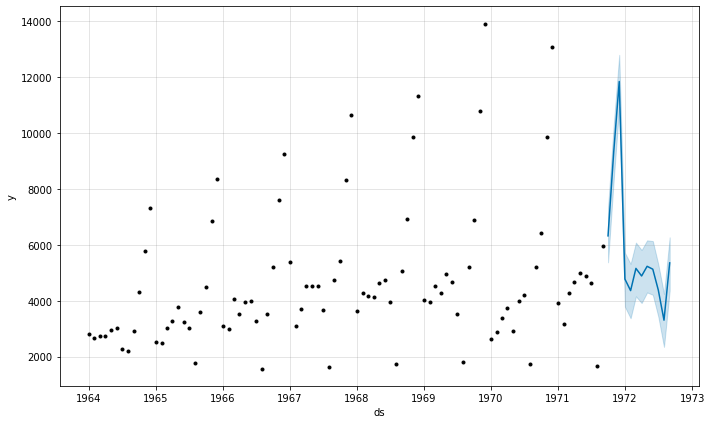

In [31]:
# Python
figura = model.plot(saida)

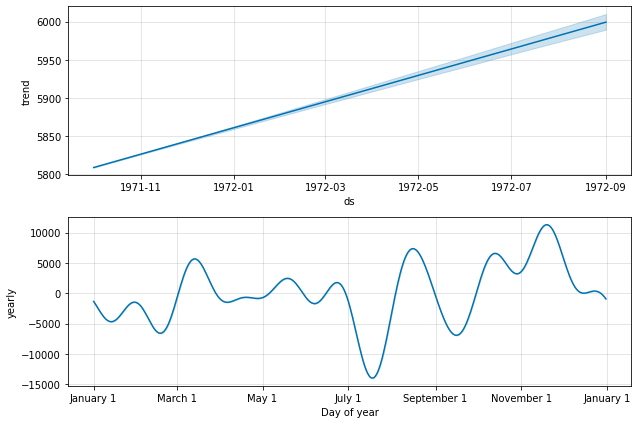

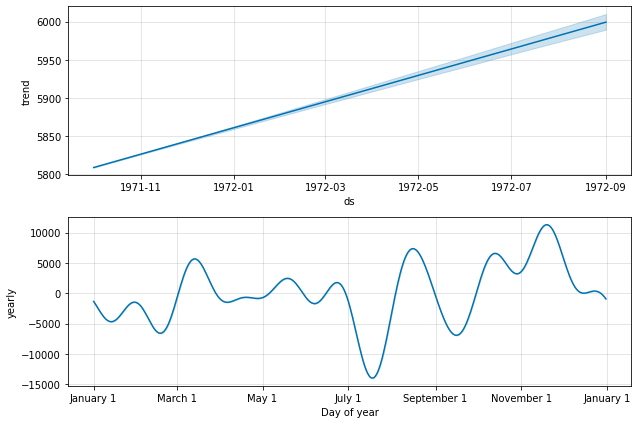

In [32]:
model.plot_components(saida)

### Tunning do Prophet

- `seasonality_mode`: Este parâmetro indica como seus componentes de sazonalidade devem ser integrados às previsões. O valor padrão é `additive`, com o parâmetro `multiplicative` sendo a outra opção. Você deve usar o  aditivo quando sua tendência de sazonalidade for "constante" durante todo o período. Por exemplo, quando você deseja que seu impacto no crescimento da tendência anual seja o mesmo que em 2010 e 2018. Isso é aplicável nos dados em que a mudança de tendência parece permanecer constante, por exemplo, o número de pessoas que vivem em uma cidade pequena. Isso ocorre porque não esperamos que o crescimento aumente repentinamente em milhões, porque não há infraestrutura para isso. Por outro lado, quando queremos prever a quantidade de pessoas que vivem em uma cidade em crescimento, o número anual de tendências pode ser muito mais importante nos últimos anos, pois a infraestrutura existe. A taxa de crescimento populacional pode ser muito mais rápida do que teria sido nos primeiros anos. Em um caso como esse, você usará multiplicativo para aumentar a importância das sazonalidades ao longo do tempo. 

- `seasonality_prior_scale`. Este parâmetro novamente permitirá que suas sazonalidades sejam mais flexíveis. É possível definir os parâmetros `anual_seasonality`, `Weekly_seasonality` e `daily_seasonality` separadamente ou ainda adiciona sua própria configuração de sazonalidade.

In [33]:
from fbprophet import Prophet

In [34]:
import pandas as pd
dataframe = pd.DataFrame({'ds': dataset.index, 'y': dataset.values})

In [35]:
dataframe

,ds,y
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946
...,...,...
88,1971-05-01,5010
89,1971-06-01,4874
90,1971-07-01,4633
91,1971-08-01,1659


Alterando o modo de sazonalidade

In [36]:
model = Prophet(seasonality_mode='multiplicative')

In [37]:
model.fit(dataframe)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
validation_df = pd.DataFrame({'ds': validation.index})

In [39]:
saida = model.predict(validation_df)

In [40]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 499.768


Alterando tipos de sazonalidade

In [41]:
# cria um modelo com sazonalidade  multiplicativa e desligando a sazonalidade diária
model = Prophet(seasonality_mode='multiplicative', daily_seasonality=False, )

In [42]:
model.fit(dataframe)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [43]:
# imprime a sazonalidade habilitada
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'multiplicative',
               'period': 365.25,
               'prior_scale': 10.0})])

In [44]:
# cria o dataframe de validação
validation_df = pd.DataFrame({'ds': validation.index})

In [45]:
# prevendo dados
saida = model.predict(validation_df)

In [46]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 499.768
